In [94]:
# importamos librerias
import numpy as np
import pandas as pd 
import re 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# importamos data set
sharks_raw = pd.read_csv("dataset/attacks.csv", encoding='ISO-8859–1')

In [4]:
# primera vision del data set
sharks_raw.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [5]:
sharks_raw.tail(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sharks_raw.shape

(25723, 24)

In [7]:
sharks_raw.info() 
# en el data set hay sobre todo floats y objects(la mayoria son strings, fechas o URL). El data set tiene 24 columnas y 25,7k filas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
# Guardamos las columnas para mas adelante
columnas = list(sharks_raw.columns)
type(columnas)
columnas

['Case Number',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex ',
 'Age',
 'Injury',
 'Fatal (Y/N)',
 'Time',
 'Species ',
 'Investigator or Source',
 'pdf',
 'href formula',
 'href',
 'Case Number.1',
 'Case Number.2',
 'original order',
 'Unnamed: 22',
 'Unnamed: 23']

In [9]:
# Eliminamos los espacios en blanco al final de los nombres de las columnas
sharks_raw.columns = sharks_raw.columns.str.strip()

In [10]:
# Eliminamos las dos ultimas columnas porque solo tienen valores nulos y no nos interesan
sharks_raw.drop(columns=["Unnamed: 22","Unnamed: 23"], inplace = True)

In [11]:
# Eliminamos las columnas de case number.1 y 2 porque estan repetidas y tienen la misma data que case number
sharks_raw.drop(columns=["Case Number.1","Case Number.2"], inplace = True)

In [12]:
# Eliminamos la columna pdf porque es la misma data que name y date(no es relevante esta columna)
sharks_raw.drop(columns=["pdf"], inplace = True)

In [13]:
# Eliminamos la columna href y href formula porque los enlaces dan error y por tanto, no relevante
sharks_raw.drop(columns = ["href","href formula"], inplace = True)

In [14]:
# Eliminamos la columna Year porque ya tenemos una columna con la fecha
sharks_raw.drop(columns = ["Year"], inplace = True)

In [15]:
sharks_raw.head()

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.25,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,2018.06.18,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0
2,2018.06.09,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0
3,2018.06.08,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0
4,2018.06.04,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299.0


In [16]:
# Empezamos comprobando los nulos
sharks_raw.isnull().sum()

Case Number               17021
Date                      19421
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
original order            19414
dtype: int64

In [17]:
# Actualizamos la lista de columnas
columnas_clean = list(sharks_raw.columns)

In [18]:
# Miramos como estan distribuidos los NAN
sharks_raw[sharks_raw[columnas_clean] == ""]
# No podemos hacer dropna porque eliminariamos filas con datos que si queremos

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# A partir de la fila 6302 los valores son Nulos podemos eliminar esas filas
sharks_raw["Date"].isna().idxmax()


6302

In [20]:
# Eliminas las filas que comentabamos anteriormente
sharks_raw.drop(sharks_raw.index[6302:], inplace=True)

In [21]:
# Tenemos que reemplazar los NAN, lo haremos por unknown porque si hacemos dropna eliminaremos filas que tambien tienen datos
sharks_raw.fillna("unknown",inplace= True)

In [22]:
sharks_raw.head()

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.25,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,2018.06.18,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",6302.0
2,2018.06.09,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",6301.0
3,2018.06.08,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",6300.0
4,2018.06.04,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,6299.0


In [23]:
# reseteamos el index para tenerlo de nuevo bien ordenado
sharks_raw.reset_index(drop=True,inplace=True)

In [24]:
# Volvemos a mirar si hay NAN
sharks_raw.isnull().sum()

Case Number               0
Date                      0
Type                      0
Country                   0
Area                      0
Location                  0
Activity                  0
Name                      0
Sex                       0
Age                       0
Injury                    0
Fatal (Y/N)               0
Time                      0
Species                   0
Investigator or Source    0
original order            0
dtype: int64

In [25]:
# Ahora revisamos si hay duplicados
sharks_raw.duplicated().sum()


np.int64(0)

In [26]:
# Modificamos la columna date con las fechas de case number
sharks_raw["Date"] = sharks_raw["Case Number"]

In [27]:
# Eliminamos la columna case number y crearemos una nueva con el indice unico
sharks_raw.drop(columns= "Case Number", inplace = True)
sharks_raw.reset_index(inplace=True)

In [28]:
# Llamamos a la columna index "Case Number de nuevo"

sharks_raw.rename(columns={"index":"Case Number"}, inplace= True)
sharks_raw.head(10)

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,1,2018.06.18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",6302.0
2,2,2018.06.09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",6301.0
3,3,2018.06.08,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",6300.0
4,4,2018.06.04,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,6299.0
5,5,2018.06.03.b,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,unknown,"No injury, board bitten",N,unknown,unknown,"Daily Telegraph, 6/4/2018",6298.0
6,6,2018.06.03.a,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297.0
7,7,2018.05.27,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,unknown,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",6296.0
8,8,2018.05.26.b,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",6295.0
9,9,2018.05.26.a,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,unknown,"K. McMurray, Tracking Sharks.com",6294.0


In [29]:
# Eliminamos las letras que hay detras de algunas fechas utilizando regex
sharks_raw["Date"].replace({"\D\D\Z" :""}, regex= True,inplace= True)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\1984144972.py:2: SyntaxWarning: invalid escape sequence '\D'
  sharks_raw["Date"].replace({"\D\D\Z" :""}, regex= True,inplace= True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\1984144972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sharks_raw["Date"].replace({"\D\D\Z" :""}, regex= True,inplace= True)


<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\2870886894.py:4: SyntaxWarning: invalid escape sequence '\A'
  sharks_raw["weird_value"] = sharks_raw["Date"].apply(lambda row: re.search("\A\d{4}\.\d{2}\.\d{2}", row) is not None)
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\2870886894.py:8: SyntaxWarning: invalid escape sequence '\A'
  sharks_all_dates["year_raw"] = sharks_all_dates["Date"].apply(lambda row: int(re.search("\A\d{4}", row)[0]))
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\2870886894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

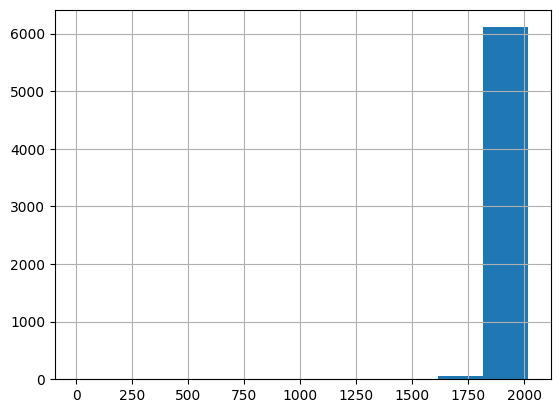

In [30]:
# Encontramos las filas que tienen fechas con valores extraños y lo visualizamos para ver cuanto representa de la muestra
# Bernardo me ayudo en esta parte, pero el proceso es aplicar a la columna date, el metodo search de regex para cada fila mediante lambda, y asi obtener los valores que cumplen el patron. 

sharks_raw["weird_value"] = sharks_raw["Date"].apply(lambda row: re.search("\A\d{4}\.\d{2}\.\d{2}", row) is not None)

sharks_all_dates = sharks_raw[sharks_raw["weird_value"] == True]

sharks_all_dates["year_raw"] = sharks_all_dates["Date"].apply(lambda row: int(re.search("\A\d{4}", row)[0]))

sharks_all_dates["year_raw"].hist()

plt.show()

In [31]:
# Vemos que la mayoria de los datos van del 1750 a la actualizad, por tanto, nos quedaremos solo con esos datos
sharks_clean_dates = sharks_all_dates[sharks_all_dates["year_raw"] >= 1750]

<Axes: >

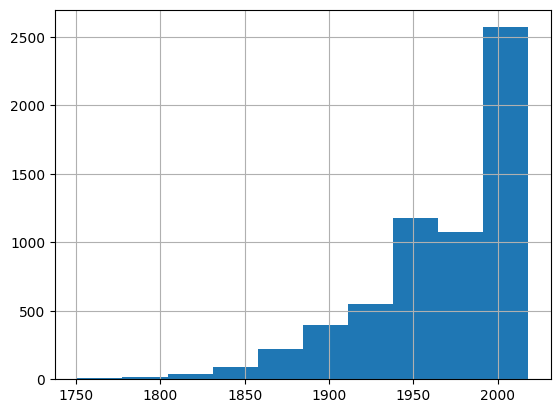

In [32]:
# Vemos que la muestra mas representativa se encuentra entre el 1900 y el 2000, de manera que me quedare la data en ese rango
sharks_clean_dates["year_raw"].hist()

<Axes: >

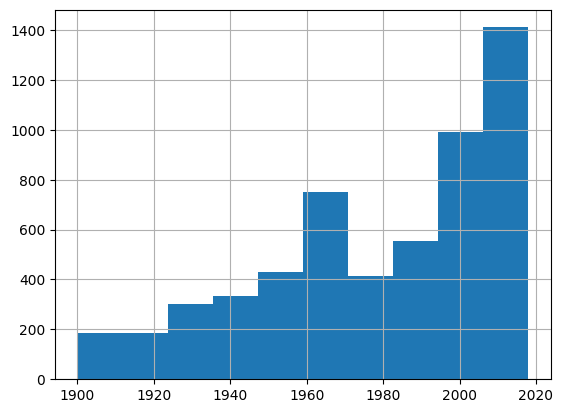

In [33]:
sharks_clean_dates = sharks_all_dates[sharks_all_dates["year_raw"] >= 1900]
sharks_clean_dates["year_raw"].hist()

In [34]:
# Eliminamos las columnas que hemos creado para comprobar que ya no nos interesan
sharks_clean_dates.drop(columns={"weird_value","year_raw"}, inplace = True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\1130572377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_clean_dates.drop(columns={"weird_value","year_raw"}, inplace = True)


In [35]:
# Creamos un diccionario con los nuevos valores de Country y actualizamos
new_Country ={525: "ENGLISH CHANNEL",
              3387: "CARIBBEAN SEA",
              3605: "FLORIDA",
              4018: "AUSTRALIA",
              4231: "NICOBAR ISLANDS",
              4266: "CAMORES & MADAGASCAR",
              4498: "CARIBBEAN SEA",
              4639: "HONG KONG",
              4700: "SOUTH AMERICA",
              4712: "VIRGIN ISLANDS",
              5020: "FRANCE",
              5425: "NEAR EQUATOR"}
sharks_clean_dates["Country"].update(pd.Series(new_Country))

C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\3660464010.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sharks_clean_dates["Country"].update(pd.Series(new_Country))
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\3660464010.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_clean_dates["Country"].update(pd.Series(new_Count

In [36]:
# Hacemos lo mismo con Area y actualizamos
sharks_clean_dates[(sharks_clean_dates["Country"] != "unknown") & (sharks_clean_dates["Area"] == "unknown")]
sharks_clean_dates[(sharks_clean_dates["Location"] != "unknown") & (sharks_clean_dates["Area"] == "unknown")]
new_area = {32: "New Caledonia",
            33: "Bahamas",
            48: "New Caledonia",
            56: "Bahamas",
            59: "Libya",
            90: "Solomon Islands",
            101: "Bahamas",
            132: "Bahamas",
            5400: "Mexico",
            5425: "Near Equator",
            5480: "Indonesia",
            5493: "Italy",
            5513: "Reunion Islands",
            5514: "Usa",
            5519: "Falkland Islands",
            5525: "Crete"}
sharks_clean_dates["Area"].update(pd.Series(new_area))

C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\3629393785.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sharks_clean_dates["Area"].update(pd.Series(new_area))
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\3629393785.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_clean_dates["Area"].update(pd.Series(new_area))


In [37]:
# Hacemos lo mismo con Location y actualizamos
sharks_clean_dates[(sharks_clean_dates["Country"] != "unknown") & (sharks_clean_dates["Location"] == "unknown")]
sharks_clean_dates[(sharks_clean_dates["Location"] == "unknown") & (sharks_clean_dates["Area"] != "unknown")]

new_location = {56: "Bahamas",
                101: "Bahamas",
                110: "Near Grand Bahama Island",
                132: "Bahamas",
                151: "Florida",
                5508: "Texas",
                5514: "Usa",
                5519: "Falkland Islands",
                5525: "Crete",
                5547: "Aden"}

sharks_clean_dates["Location"].update(pd.Series(new_location))


C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\2499680617.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sharks_clean_dates["Location"].update(pd.Series(new_location))
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\2499680617.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_clean_dates["Location"].update(pd.Series(new_lo

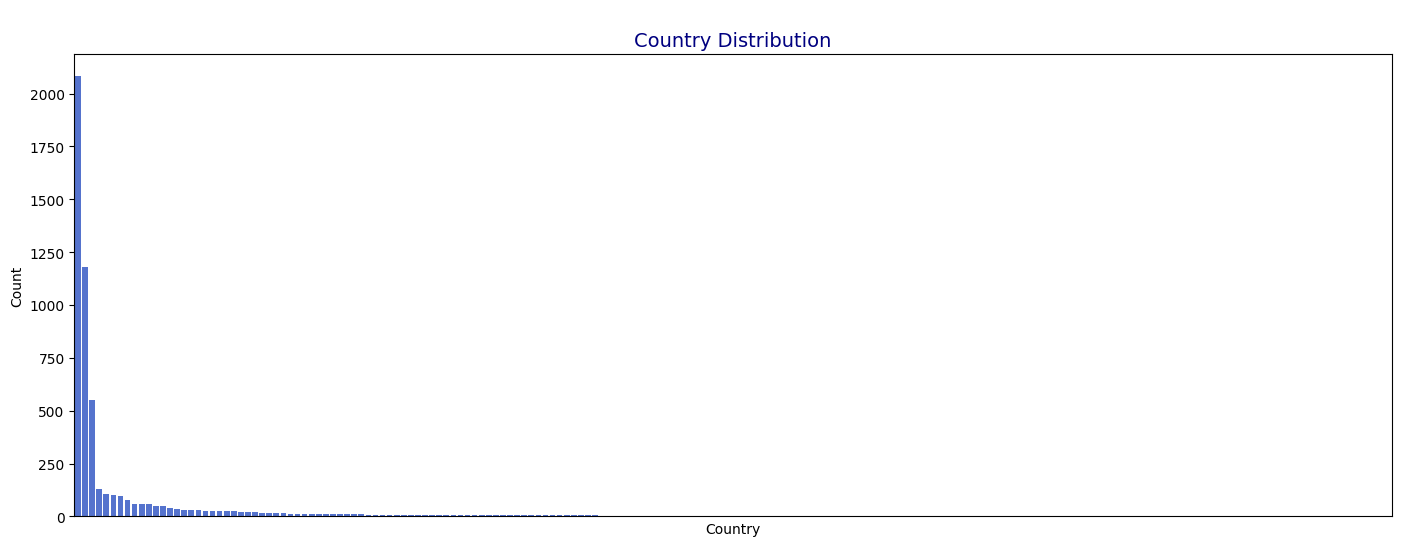

In [38]:
# Vamos a ver como se distribuye en funcion del pais, area y location. Vemos que hay demasiados paises como para sacar conclusiones, de manera, que tendremos que quedarnos con una muestra mas representativa
df = sharks_clean_dates["Country"].value_counts()
plt.figure(figsize=(17, 6))
sns.countplot(x='Country', data=sharks_clean_dates, order=df.index, color='royalblue')
plt.title('\nCountry Distribution', color='navy', size = 14)
plt.xlabel('Country')
plt.xticks([])
plt.ylabel('Count')
plt.show()


In [39]:
# Dado que 138 filas no suponen una muestra grande sobre las 6k que tenemos, obviaremos estas de cara a poder sacar conclusiones.
sharks_clean_dates[(sharks_clean_dates["Location"] == "unknown") & (sharks_clean_dates["Area"] == "unknown") & (sharks_clean_dates["Location"] == "unknown")]
sharks_all_country = sharks_clean_dates[(sharks_clean_dates["Location"] != "unknown") & (sharks_clean_dates["Area"] != "unknown") & (sharks_clean_dates["Location"] != "unknown")]

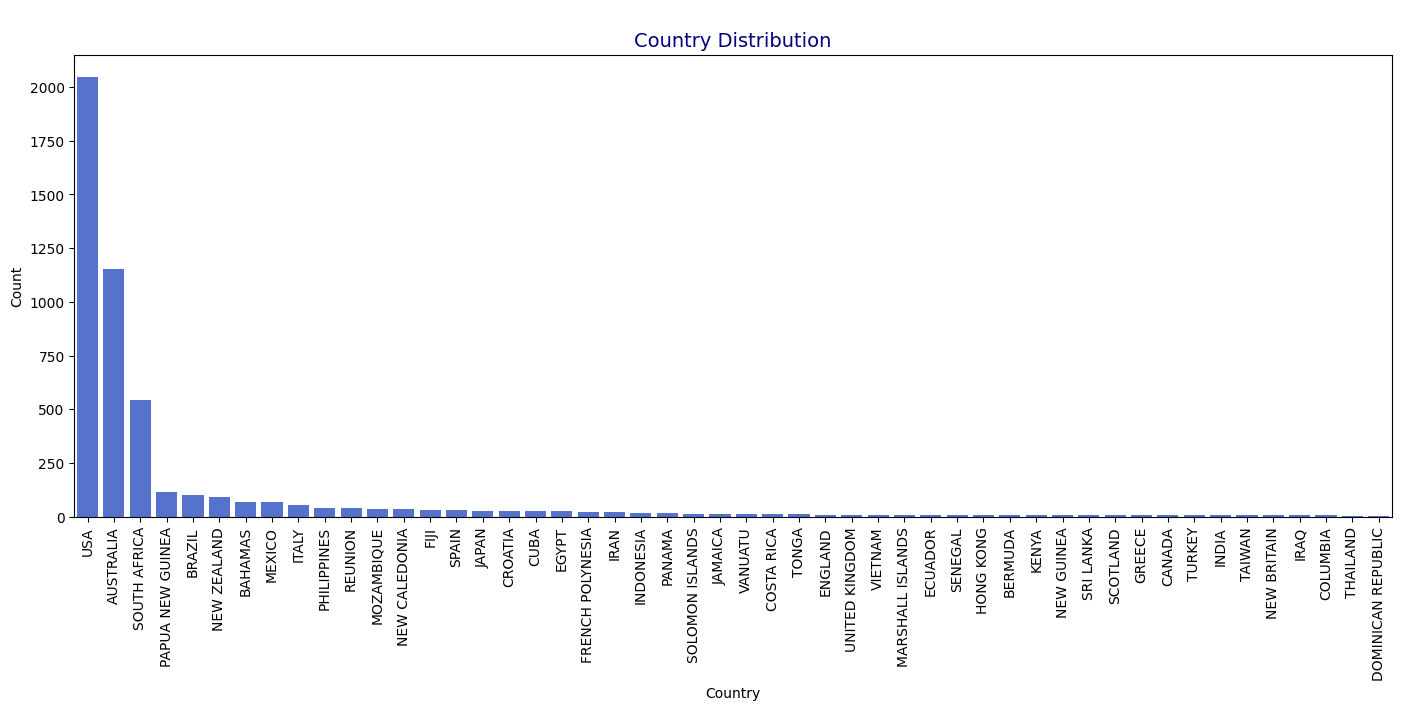

In [40]:
df = sharks_all_country["Country"].value_counts().head(50)
plt.figure(figsize=(17, 6))
sns.countplot(x='Country', data=sharks_all_country, order=df.index, color='royalblue')
plt.title('\nCountry Distribution', color='navy', size = 14)
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [41]:
# SACAR LOS CONCLUSIONES CON LAS ZONAS MAS REPRESENTATIVAS

In [42]:
# Intentamos deducir el sexo por el nombre y actualizamos
#pd.options.display.max_rows = 20
sharks_all_country[(sharks_all_country["Sex"] == "unknown") & (sharks_all_country["Name"] != "unknown") & (sharks_all_country["Name"] != "anonymous")]

new_sex = {218: "M",
            243: "M",
            326: "M",
            513: "M",
            805: "M",
            839: "M",
            911: "M",
            1164: "M",
            1177: "M",
            1186: "M",
            1405: "F",
            1522: "M",
            1525: "F",
            1655: "M",
            1995: "M",
            2221: "M",
            2225: "M",
            2246: "M",
            2424: "M",
            2452: "M",
            2472: "M",
            2478: "M",
            2502: "M",
            2571: "M",
            3059: "M",
            3162: "M",
            3235: "M",
            3680: "M",
            3768: "M",
            3772: "M",
            3819: "M",
            3824: "M",
            3847: "M",
            3855: "M",
            3926: "M",
            4034: "M",
            4035: "M",
            4036: "F",
            4061: "M",
            4079: "M",
            4082: "M",
            4083: "M",
            4087: "M",
            4092: "M",
            4127: "M",
            4135: "M",
            4173: "M",
            4188: "M",
            4242: "M",
            4274: "M",
            4289: "F",
            4306: "M",
            4307: "M",
            4403: "M",
            4404: "M",
            4467: "M",
            4576: "M",
            4587: "M",
            4590: "M",
            4601: "M",
            4832: "M",
            4738: "M",
            4741: "M",
            4784: "M",
            4803: "M",
            4839: "M",
            4856: "M",
            4875: "M",
            4877: "M",
            4906: "M",
            5008: "M",
            5019: "M",
            5082: "M",
            5187: "M",
            5198: "M",
            5125: "M",
            5203: "M",
            5221: "M",
            5254: "M",
            5549: "M",
            5502: "M",
            5560: "M",
            }

sharks_all_country["Sex"].update(pd.Series(new_sex))
# Eliminamos espacios en blanco y valores no desados
sharks_all_country["Sex"].replace({"M ": "M",
                                   "N": "M",
                                   "lli": "unknown"}, inplace= True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\1561004026.py:89: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sharks_all_country["Sex"].update(pd.Series(new_sex))
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\1561004026.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Sex"].update(pd.Series(new_sex))
C:\Users\lu

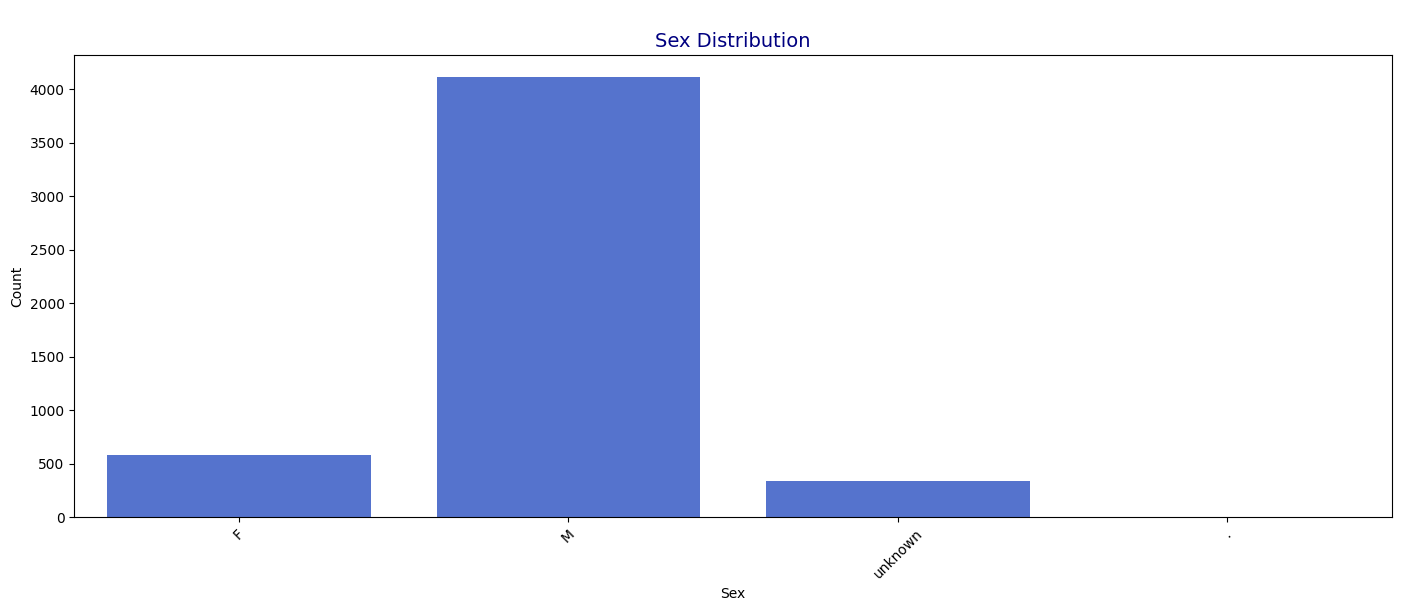

In [43]:
# Vamos a ver como se distribuye la variable sexo
# Observamos que aun queda algun unknown. 
# Pero con este grafico observamos que la mayoria de ataques por tiburones se da contra el genero masculino
plt.figure(figsize=(17, 6))
sns.countplot(x='Sex', data=sharks_all_country, color='royalblue')
plt.title('\nSex Distribution', color='navy', size = 14)
plt.xlabel('Sex')
plt.xticks(rotation =  45)
plt.ylabel('Count')
plt.show()

In [44]:
# Examinamos Age para corregir valores extraños. Utilizaremos el metodo replace para corregir los datos ya que hay objetos repetidos
# De cara a reemplazar los años, dado que, muchos se encuentran en rangos utilizaremos la mediana.
sharks_all_country[(sharks_all_country["Age"] != "unknown") & (sharks_all_country["Age"].str.contains(r"\D[a-zA-Z]"))] # Utilizamos una mascara y regex para encontrar los valores extraños
sharks_all_country[(sharks_all_country["Age"] != "unknown") & (sharks_all_country["Age"].str.contains(r"^\d\d\s\D"))]
sharks_all_country[(sharks_all_country["Age"] != "unknown") & (sharks_all_country["Age"].str.contains(r"^\d\s\s"))]
sharks_all_country[(sharks_all_country["Age"] != "unknown") & (sharks_all_country["Age"].str.contains(r"\A\D\s"))]
sharks_all_country["Age"].replace({"Teen": "16", # Persona entre 13 y 19 de manera que cogemos la mediana que es 16.
                                   "teen": "16",
                                   "18 months": "1",
                                "18 or 20": "19",
                                "12 or 13": "12",
                                "Teens": "16",
                                "8 or 10": "9",
                                "30 or 36": "33", # Mediana
                                "33 or 37": "35",
                                "mid-30s": "35", # Mediana de la decada. Entre 30 y 40 - 35
                                "60s": "65", # Mediana de la decada. Entre 60 y 70 - 65
                                "16 to 18": "17",
                                "mid-20s": "25",
                                "Ca. 33":"33", # Suponemos que se trata de un error al entrar la edad 
                                "21 or 26": "24",
                                "18 to 22": "20",
                                "adult":"42", # En este caso la edad adulta va de los 25 a los 60, asi que suponemos la media
                                "(adult)":"42",
                                "25 or 28": "26",
                                '"middle-age"':"50", # Middle age va entro los 40 y los 60 asi que cogemos la mediana 
                                "13 or 18": "16",
                                "2 or 3 months": "1", # Supondremos que esta mas cerca de los 0 años pero como no tiene sentido que tenga 0 años ponemos 1
                                "MAKE LINE GREEN": "unknown",
                                'young': "20", # La edad joven va entre los 15 y los 24, cogemos la mediana
                                "7 or 8": "7",
                                "8 or 10": "9",
                                "Both 11": "11",
                                "9 or 10": "9",
                                "A.M.": "unknown",
                                "10 or 12": "11",
                                "31 or 33": "32",
                                "2 to 3 months" : "1",
                                "28 & 26": "27", # Cogemos la mediana
                                "36 & 26": "31", # Cogemos la mediana
                                "21 & ?": "unknown",
                                "23 & 20": "22",
                                "23 & 26": "24",
                                "33 & 37": "35",
                                "30 & 32": "31",
                                "50 & 30": "40",
                                "17 & 35": "26",
                                "34 & 19": "27",
                                "33 & 26": "30",
                                "17 & 16": "17",
                                "36 & 23": "30",
                                "7   &   28": "18",
                                "9 & 12": "11",
                                "? & 19": "unknown",
                                "?   &   14": "unknown",
                                "30s": "35",
                                "50s": "55",
                                "6½": "6", # Redondeamos hacia a bajo
                                "40s": "45",
                                "20s": "25", 
                                "21, 34,24 & 35": "29", # Hacemos la media y redondeamos hacia arriba
                                "74 ": "74", # Sacamos espacios en blanco
                                "45 ": "45",
                                "20 ": "20",
                                ">50": "unknown", # Dado que es un rango muy elevado mejor pasar esta muestra a unknown
                                "\xa0 ": "unknown",
                                "X": "unknown",
                                "F": "unknown",
                                " ": "unknown",
                                " 30": "30",
                                " 28": "28",
                                " 43": "43",
                                "  ": "unknown",
                                "60's": "65",
                                '"young"': "20",
                                }, inplace= True)
# Para esta fila realizamos el cambio de esta manera por problemas en el replace ,
new_age = ({3986:"26", # 37, 67, 35, 27, ? & 27 hacemos la media contando que son 6 personas
            2422: "19", # 7 & 31 cogemos la mediana que es 19
            5181: "unknown",}) # ? & 14 unknown
sharks_all_country["Age"].update(pd.Series(new_age))


C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\3026283638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Age"].replace({"Teen": "16", # Persona entre 13 y 19 de manera que cogemos la mediana que es 16.
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\3026283638.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Age"].update(pd.Series(new_age))


In [45]:
# Nos quedamos los datos de Age conocidos para intentar analizar los datos
sharks_all_ages = sharks_all_country[sharks_all_country["Age"] != "unknown"]

<Axes: >

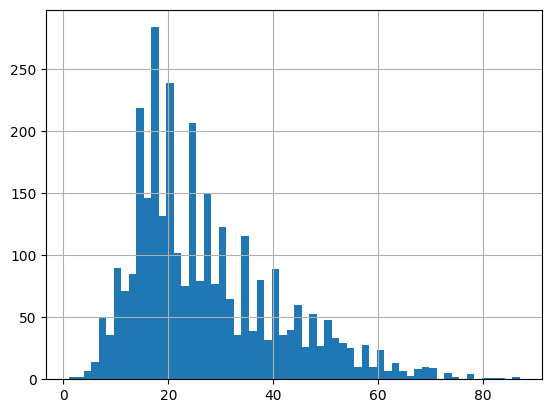

In [46]:
# Ahora que hemos arreglado Age podemos ver como se distribuye, vemos que la mayoria de los datos se distribuyen entre los 18 y los 38
# Convertimos la data a integer
sharks_all_ages["Age"].astype(int).hist(bins=60)


In [47]:
# Corregimos valores de Fatal mediante el replace
sharks_all_country[(sharks_all_country["Fatal (Y/N)"] != "unknown") &
                    sharks_all_country["Fatal (Y/N)"].str.contains(r"\A\s") |
                      sharks_all_country["Fatal (Y/N)"].str.contains(r"\A\d") |
                        sharks_all_country["Fatal (Y/N)"].str.contains(r"\A\w[A-Z]") ]
sharks_all_country["Fatal (Y/N)"].replace({" N": "N",
                                           "N ": "N",
                                           "y": "Y",
                                           "M": "N", # Suponemos que es un error tipografico
                                           "2017" : "unknown",
                                           "UNKNOWN": "unknown",
                                           }, inplace= True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\1761277063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Fatal (Y/N)"].replace({" N": "N",


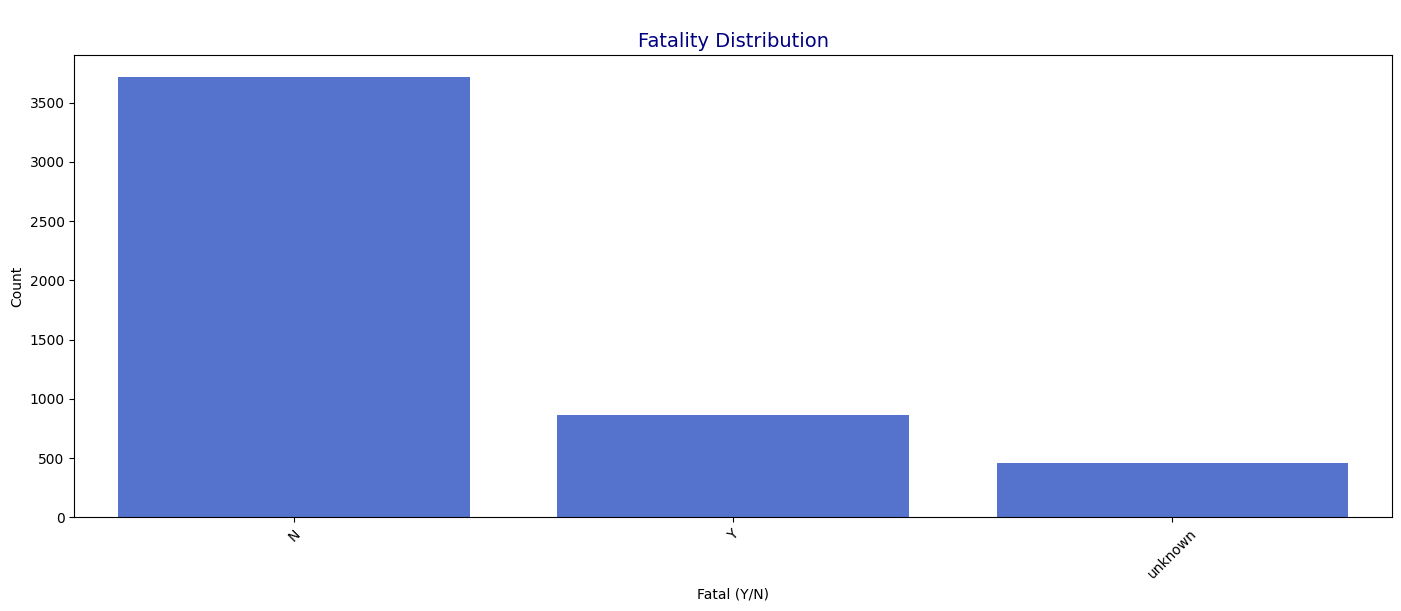

In [48]:
# Visualizamos la variable Fatal y podemos observar que la gran mayoria de los ataques no han sido mortales con diferencia, aun y teniendo una muestra poco significativa de unknowns
plt.figure(figsize=(17, 6))
sns.countplot(x='Fatal (Y/N)', data=sharks_all_country, color='royalblue')
plt.title('\nFatality Distribution', color='navy', size = 14)
plt.xlabel('Fatal (Y/N)')
plt.xticks(rotation =  45)
plt.ylabel('Count')
plt.show()

In [49]:
# Comprobamos las especies de tiburon, tenemos que limpiar los valores extraños 
sharks_all_country["Species"].value_counts()


Species
unknown                                                        1965
White shark                                                     150
Shark involvement prior to death was not confirmed               92
Shark involvement not confirmed                                  78
Invalid                                                          76
                                                               ... 
1.8 m to 2.7 m [6' to 9'] shark                                   1
Fishermen recovered partial remains from shark a week later       1
Remains recovered 5 days later                                    1
Shortfin mako shark, 175-lb                                       1
White shark, 6 m                                                  1
Name: count, Length: 1441, dtype: int64

In [50]:

# Dado que hay muchos tiburones donde solo nos dan el tamaño haremos esa asuncion como especie

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Bull shark" 
          if "bull shark" in x.lower()
          or "zambeshi" in x.lower()
          or "zambesi" in x.lower()
          or "possibly" in x.lower() 
          or "c.leucas" in x.lower()
          or "c. leucas" in x.lower()
          or "zambezi" in x.lower()
          else x)


sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "White shark" if "white" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Tiger shark" if "tiger" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Lemon shark" if "lemon" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Wobbegong shark"
          if "wobbegong" in x.lower()
          or "carpet" in x.lower()
          else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Blacktip shark" if "black" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Cooper shark"
          if "bronze" in x.lower()
          or "whaler" in x.lower()
          or "copper" in x.lower()
          else x) # Buscamos en internet el nombre comun

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Sand Tiger shark"
           if "raggedtooth" in x.lower()
           or "grey nurse" in x.lower()
           else x) # Buscamos en internet el nombre comun

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Nurse shark" 
          if "nurse" in x.lower()
          or "juvenile nurse" in x.lower()
          else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Blue shark" 
          if "blue" in x.lower()
          or '"a blue shark"' in x.lower()
          else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Mako shark" 
          if "mako" in x.lower()
           or "shortfin mako" in x.lower()
           or "blue pointer, 11'" in x.lower()
           or "bonita sharkk, 200-lb" in x.lower()
           else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Hammerhead shark" if "hammerhead" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Spinner shark" if "spinner" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Sand shark"
          if '"sand shark' in x.lower()
          or "80-lb sand shark" in x.lower()
          or "40-lb sand shark" in x.lower()
          or "a sand shark" in x.lower()
          or "sandshark" in x.lower()
          or '"sand shark"' in x.lower()
          or "sand" in x.lower()
          or "sandbar shark" in x.lower()
          else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Basking shark" if "basking" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Angel shark" if "angel" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Galapagos shark" if "galapagos" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Sevengill shark"
          if "sevengill" in x.lower()
          or "seven-gill" in x.lower()
          or "7-gill" in x.lower()
          else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Reef shark"
          if "grey reef" in x.lower()
          or "reef shark, 1m" in x.lower()
          or '"grey shark"' in x.lower()
          or "reef" in x.lower()
          or '"gray shark"' in x.lower()
          else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Cookiecutter shark"
          if "cookiecutter" in x.lower()
          or "thought" in x.lower()
          else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Common Thresher shark"
          if '"whiptail shark" (thresher shark?)' in x.lower()
          or "thresher" in x.lower()
          else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Dog shark"
          if '"a dog shark"' in x.lower() # dog shark es el nombre generico para referirse a la familia de los tiburones
          or '250-lb "dog shark"' in x.lower()
          or "dogfish" in x.lower()
          or "spurdog" in x.lower()
          else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Porbeagle shark" if "porbeagle" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Cow shark" if "cow" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Salmon shark" if "salmon" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Soupfin shark" if "soupfin" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Leopard shark" if "leopard" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Requiem shark" if "c. macrurus" in x.lower() else x)

sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Whale shark" if "whale" in x.lower() else x)

# Consideraremos que entre 0.5 y 1.5m es un tiburon pequeño (1 y 4 pies)
sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Undefined small-sized shark" 
          if "4'" in x.lower()
          or "3'" in x.lower()
          or "a small" in x.lower()
          or "small" in x.lower()
          or "1.5" in x.lower()
          or "1 m" in x.lower()
          or "2'" in x.lower() 
          or "juvenile" in x.lower()
          or "1m" in x.lower()
          or '"a little shark"' in x.lower()
          or "20 to 30kg shark" in x.lower()
          or "8-lb" in x.lower()
          or "20 kg" in x.lower()
          or "80-lb" in x.lower()
          or '43"' in x.lower()
          or '24"' in x.lower()
          or '36"' in x.lower()
          or "60 cm" in x.lower()
          or "30-kg" in x.lower()
          or '"a young shark"' in x.lower()
          or "15 cm" in x.lower()
          else x)

# Consideraremos que entre 1 y 2.5m es un tiburon mediano (5 y 8 pies)
sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Undefined mid-sized shark" 
          if "6'" in x.lower() 
          or "5'" in x.lower() 
          or "1.8 m" in x.lower() 
          or "2 m" in x.lower()
          or "2.4" in x.lower()
          or "4'" in x.lower()
          or "3'" in x.lower()
          or "7'" in x.lower()
          or "8'" in x.lower()
          or "2.5" in x.lower()
          or "2m" in x.lower()
          or "100-lb" in x.lower()
          or "200-lb" in x.lower()
          or "136-kg [300-lb] shark" in x.lower()
          or "80 kg" in x.lower()
          or "2.27" in x.lower()
          or "150-lb" in x.lower()
          or "1.7" in x.lower()
          or "170-kg," in x.lower()
          else x)

# Consideraremos que de 2.5 hacia arriba es un tiburon grande ( > 8 pies)
sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Undefined big-sized shark" 
          if "3m" in x.lower() 
          or "3 m" in x.lower()
          or "3.7" in x.lower()
          or "12'" in x.lower()
          or "10'" in x.lower()
          or "9'" in x.lower()
          or "a large" in x.lower()
          or "18" in x.lower()
          or "Allegedly a 33-foot shark" in x.lower()
          or "20'" in x.lower()
          or "3.5 m" in x.lower()
          or "6 m" in x.lower()
          or "15* to 24" in x.lower() # dog shark hace referencia a la familia de los tiburones
          or '"a very large shark"' in x.lower()
          or "9-foot" in x.lower()
          or "3+" in x.lower()
          or "3-" in x.lower()
          or "650-lb" in x.lower()
          or "3.5" in x.lower()
          or "5 m" in x.lower()
          or "2 days later" in x.lower()
          or "said to be 6.4 m [21'] shark" in x.lower()
          or "5m" in x.lower()
          or "4 m" in x.lower()
          or "500-lb" in x.lower()
          or "300-kg" in x.lower()
          or "270 kg" in x.lower()
          or "200 to" in x.lower()
          or '"shark had a very large girth"' in x.lower()
          else x)

# Hacemos una lista de los tiburones conocidos para poder filtrar y ver que valores nos faltan
known_list = ["Bull shark", "White shark", "Tiger shark", "Lemon shark", "Wobbegong shark", "Mako shark",
              "Undefined big-sized shark","Undefined mid-sized shark", "Undefined small-sized shark",
              "Galapagos shark","Blue shark","Sevengill shark","Angel shark","Basking shark","Sand shark",
              "Spinner shark","Hammerhead shark", "Nurse shark","Sand Tiger shark","Cooper shark","Blacktip shark",
              "Wobbegong shark","Lemon shark", "Unknown specie","Reef shark","Cookiecutter shark","Dog shark",
              "Common Thresher shark","Porbeagle shark","Cow shark","Not shark","Salmon shark","Soupfin shark","Leopard shark",
              "Requiem shark","Whale shark"]

# sharks_all_country["Species"] = sharks_all_country["Species"].\
#     apply(lambda x: "Other" if x not in known_list else x)

# Reemplazamos por unknown aquellas especies donde sea imposible hacer ninguna asuncion
sharks_all_country["Species"].replace({"Questionable" : "Unknown specie",
                                       "unknown": "Unknown specie",
                                       "Questionable incident": "Unknown specie",
                                       "Shark involvement prior to death was not confirmed": "Unknown specie",
                                       "Shark involvement not confirmed" : "Not shark",
                                       "Shark involvement prior to death unconfirmed": "Unknown specie",
                                       "Shark involvement prior to death not confirmed": "Unknown specie",
                                       "No shark involvement": "Not shark",
                                       "Unidentified species" : "Unknown specie",
                                       "Invalid": "Unknown specie",
                                       " ": "Unknown specie",
                                       "Fishermen recovered partial remains from shark a week later": "Unknown specie",
                                       "Invalid incident": "Not shark",
                                       "Shark involvement probable": "Unknown specie",
                                       '"A pack of 6 sharks"': "Unknown specie",
                                       "2 sharks": "Unknown specie",
                                       '"grey-colored shark"':"Unknown specie",
                                       'Attacked by a number of sharks"':"Unknown specie",
                                       "Shark involvement questionable": "Not shark", 
                                       "Death may have been due to drowning": "Unknown specie",
                                       "Shark involvement highly doubtful":"Not shark",
                                       '"Attacked by a number of sharks"':"Unknown specie",
                                       "Tooth fragments recovered from hull":"Unknown specie",
                                       "Several sharks involved":"Unknown specie",
                                       "Unknow specie": "Unknown specie",
                                       "Questionable Incident":"Not shark",
                                       '"A long thin brown-colored shark"':"Unknown specie",
                                       "8 sharks":"Unknown specie",
                                       "Shark involvement doubtful":"Not shark",
                                       "2 sharks involved":"Unknown specie",
                                       "A pack of 6 sharks":"Unknown specie",
                                       "Species unidentified":"Unknown specie",
                                       "Shark involvement prior to death unconfired":"Unknown specie",
                                       "Shark involvement unconfirmed":"Not shark",
                                       "Unidentified	":"Unknown specie",
                                       '"Considered a "Doubtful" incident"':"Not shark",
                                       "Unidentified":"Unknown specie",
                                       "Unidentified shark":"Unknown specie",
                                       'Considered a "Doubtful" incident':"Not shark",
                                       "Reported as a shark attack, the story was a hoax":"Not shark",
                                       "Shark involvement questionable":"Not shark",
                                       "C. maculpinnis or C. limbatus": "Unknown specie",
                                       "Shark involvement  questionable":"Not shark",
                                       "40 to 50 sharks attacked survivors in the water":"Unknown specie",
                                       "Doubtful / Unconfirmed attack / Unable to verify in local records":"Not shark",
                                       "\xa0 ": "Unknown specie",
                                       }, inplace= True)

sharks_all_country["Species"].value_counts()

C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\1574714825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Species"] = sharks_all_country["Species"].\
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\1574714825.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Species"] = sharks_all_country["Species"].\
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\1574714825.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Species
Unknown specie                                                                                           2262
White shark                                                                                               622
Undefined small-sized shark                                                                               469
Undefined mid-sized shark                                                                                 296
Tiger shark                                                                                               250
                                                                                                         ... 
7 shark's teeth found embedded in the woodwork of the boat                                                  1
Atkins' remains were recovered from a dusky shark, C. obscurus, by Capt. W. F. Young, shark fisherman       1
Requiem shark                                                                                               1
Re

In [51]:
# Terminamos de limpiar lo que quedaba
sharks_all_country["Species"] = sharks_all_country["Species"].\
    apply(lambda x: "Unknown specie" 
          if "remains" in x.lower()
          or "injury" in x.lower()
          or "some" in x.lower()
          or "no" in x.lower()
          or '"a school of sharks"' in x.lower()
          or "questionable incident - shark bite" in x.lower()
          or "7 shark's teeth" in x.lower()
          or "shark seen feeding" in x.lower()
          else x)

# Utilizamos este filtro para ver si van quedando lineas
sharks_all_country[sharks_all_country["Species"].isin(known_list) == False]

C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\1141075376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Species"] = sharks_all_country["Species"].\


,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order


Species
Unknown specie                 2403
White shark                     622
Undefined small-sized shark     469
Undefined mid-sized shark       296
Tiger shark                     250
Bull shark                      231
Undefined big-sized shark       122
Sand shark                      103
Blacktip shark                   84
Cooper shark                     75
Wobbegong shark                  51
Nurse shark                      50
Mako shark                       45
Blue shark                       43
Hammerhead shark                 41
Reef shark                       41
Lemon shark                      26
Sevengill shark                  17
Spinner shark                    17
Dog shark                         7
Porbeagle shark                   6
Galapagos shark                   6
Cookiecutter shark                5
Angel shark                       5
Basking shark                     5
Salmon shark                      3
Common Thresher shark             3
Cow shark           

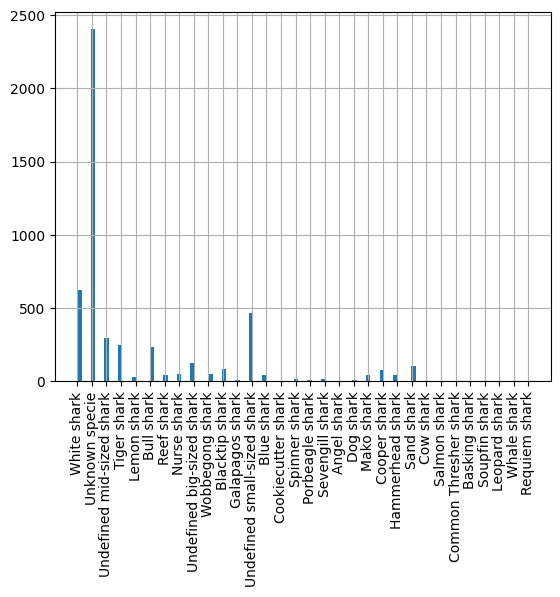

In [52]:
# una vez limpiado la columna specie la visualizamos
sharks_all_country["Species"].hist(bins=100)
plt.xticks(rotation = 90)
sharks_all_country["Species"].value_counts()

Species
White shark                    622
Undefined small-sized shark    469
Undefined mid-sized shark      296
Tiger shark                    250
Bull shark                     231
Undefined big-sized shark      122
Sand shark                     103
Blacktip shark                  84
Cooper shark                    75
Wobbegong shark                 51
Nurse shark                     50
Mako shark                      45
Blue shark                      43
Hammerhead shark                41
Reef shark                      41
Lemon shark                     26
Sevengill shark                 17
Spinner shark                   17
Dog shark                        7
Porbeagle shark                  6
Galapagos shark                  6
Cookiecutter shark               5
Angel shark                      5
Basking shark                    5
Salmon shark                     3
Common Thresher shark            3
Cow shark                        2
Leopard shark                    2
Soupfin shar

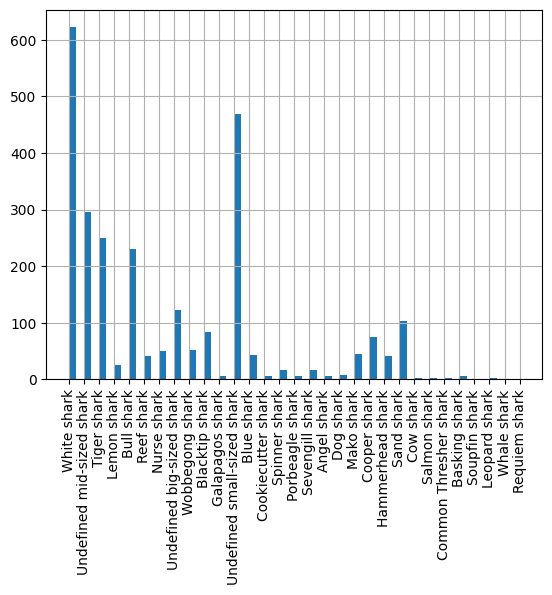

In [77]:
# Dado que queremos analizar el impacto de los tiburones que si conocemos, cogeremos un subset de estos y lo visualizamos
sharks_all_species = sharks_all_country[(sharks_all_country["Species"] != "Unknown specie")]
sharks_all_species["Species"].hist(bins=60)
plt.xticks(rotation = 90)
sharks_all_species["Species"].value_counts()

In [78]:
sharks_all_species["Activity"].value_counts().head(20)

Activity
Surfing            539
Swimming           292
Spearfishing       209
Fishing            202
unknown             83
Wading              67
Snorkeling          58
Scuba diving        50
Diving              43
Standing            43
Body boarding       37
Kayaking            27
Body surfing        22
Swimming            20
Treading water      18
Free diving         15
Bathing             15
Boogie boarding     13
Shark fishing       12
Surf-skiing         11
Name: count, dtype: int64

In [79]:
# Por ultimo, limpiaremos Activity que es de interes para mis hipotesis
sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Fishing"
          if "fishing" in x.lower()
          or "harpooning" in x.lower()
          or "spearfishing" in x.lower()
          or "collecting" in x.lower()
          or "feeding" in x.lower()
          or "lobstering" in x.lower()
          or "cleaning fish" in x.lower()
          or "hunting" in x.lower()
          or "casting a net" in x.lower()
          or "catching" in x.lower()
          or "washing sand off a speared fish" in x.lower()
          or "crabbing" in x.lower()
          or "taking catch" in x.lower()
          or "removing" in x.lower()
          or "gathering" in x.lower()
          or "shrimping" in x.lower()
          or "crawling" in x.lower()
          or "shrimp" in x.lower()
          or "fisherman" in x.lower()
          or "fish" in x.lower()
          or "netting" in x.lower()
          or "clamming" in x.lower()
          or "cleaning" in x.lower()
          or "prawn" in x.lower()
          or "prawns" in x.lower()
          or "pêcheur" in x.lower()
          or "gigging" in x.lower()
          or "line" in x.lower()
          or "opihi" in x.lower()
          or "lining" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Swimming"
          if "swimming" in x.lower()
          or "treading " in x.lower() 
          or "bathing" in x.lower()
          or "floating" in x.lower()
          or "sitting in the water" in x.lower()
          or "wading" in x.lower() # lo agruparemos en esta categoria ya que la traduccion literal es estar flotando en el agua
          or "batin" in x.lower()
          or "lying" in x.lower()
          or "crouching" in x.lower()
          or "in waist-deep water" in x.lower()
          or "in deep water about 100 yards from his ship" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Surfing"
          if "surfing" in x.lower()
          or "sitting on surfboard" in x.lower()
          or "playing in the surf " in x.lower()
          or "surfng" in x.lower()
          or '"riding waves on a board"' in x.lower()
          or "resting" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Surf-skiing"
          if "surf-skiing" in x.lower()
          or "surf skiing" in x.lower()
          or "kite" in x.lower()
          or "ski" in x.lower()
          or "skiing" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Kayaking"
          if "kayaking" in x.lower()
          or "canoeing" in x.lower() # los agruparemos ya que es practicamente lo mismo
          or "rowing" in x.lower()
          or "kakaying" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Diving"
          if "diving" in x.lower()
          or "snorkeling" in x.lower() # agrupamos estas dos actividades ya que son similares e implican bucear
          or "dived" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Body boarding"
          if "boogie" in x.lower()
          or "body" in x.lower()
          else x)


sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Standing"
          if "standing" in x.lower()
          or "walking" in x.lower()
          or "hiking" in x.lower() # Lo agrupamos en esta categoria para señalar que estaba en la playa y no haciendo una actividad aquatica
          or "stamding" in x.lower()
          or "sittting" in x.lower()
          or "sitting" in x.lower()
          or "bending" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Boating"
          if "boating" in x.lower()
          or "boat" in x.lower()
          or "yacht" in x.lower()
          or "sailing" in x.lower()
          or "jet skiing" in x.lower() # se trata de una embarcacion
          or "cruising" in x.lower()
          or "towing" in x.lower()
          or "cutter" in x.lower()
          or "on a float" in x.lower()
          or "riding" in x.lower()
          or "raft" in x.lower()
          or "racing" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Playing in the water"
          if "playing" in x.lower()
          or "plating" in x.lower()
          or "dangling" in x.lower()
          or "filming" in x.lower()
          or "skimboarding" in x.lower()
          or "kneeling" in x.lower()
          or "jumping" in x.lower()
          or "wakeboarding" in x.lower()
          or "washing" in x.lower()
          or "jumped into the water" in x.lower()
          or "jumped" in x.lower()
          or "splashing" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Paddleing"
          if "paddle" in x.lower()
          or "stand-Up Paddleboarding" in x.lower()
          or "paddleskiing" in x.lower()
          or "sculling" in x.lower()
          or "paddling" in x.lower()
          or "sup" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Chasing sharks"
          if "touching" in x.lower()
          or "attempting" in x.lower()
          or "grabbing" in x.lower()
          or "shooting" in x.lower()
          or "tagging" in x.lower()
          or "teasing" in x.lower()
          or "petting" in x.lower()
          or "wrangling" in x.lower()
          or "measuring" in x.lower()
          or "dragging stranded shark into deeper water" in x.lower()
          or "reviving a sedated shark" in x.lower()
          or "shark" in x.lower()
          or "conducting" in x.lower()
          or "seine netting" in x.lower()
          or "scientific" in x.lower()
          or "retrieving" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Photographing"
          if "photo" in x.lower()
          or "photographing" in x.lower()
          else x)

sharks_all_species["Activity"] = sharks_all_species["Activity"].\
    apply(lambda x: "Accident"
          if "disaster" in x.lower()
          or "fell" in x.lower()      
          or "wreck" in x.lower()
          or "knocked" in x.lower()
          or "murder" in x.lower()
          or "seaplane" in x.lower()
          or "watching" in x.lower()
          or "disappeared" in x.lower()
          or "swept" in x.lower()
          or "the" in x.lower()
          or "lifesaving" in x.lower()
          or "aircraft" in x.lower()
          or "escaping" in x.lower()
          or "rescuing" in x.lower()
          or "dry" in x.lower()
          or "anchor" in x.lower()
          or "aquarium" in x.lower()
          or "washed" in x.lower()
          or "suicide" in x.lower()
          else x)

# Dado que el type es disaster marcaremos como accidente la actividad para poder clasificarlo
sharks_all_species["Activity"] = np.where(sharks_all_species["Type"]=="Sea Disaster", "Accident",sharks_all_species["Activity"])

# Hacemos una lista con la que poder ir filtrando actividades conocidas para terminar de limpiar
known_activity = ["Fishing","Swimming","Surfing","Surf-skiing","Kayaking","Diving","Body boarding","Standing","Boating","Paddleing","Unknown",
                  "Chasing sharks","Playing in the water","Photographing","Sailing","Accident"]

# Hacemos un replace generico para valores extraños
sharks_all_species["Activity"].replace({".":"Unknown",
                                        "unknown":"Unknown",
                                        "Shipwrecked	":"Accident",
                                        "Taking wife to beach & about 1 m from the shore": "Accident",
                                        "Washed overboard	": "Accident",
                                        "Lifesaving drill":"Accident",
                                        "Washed overboard":"Accident",
                                        "Shipwrecked":"Accident",
                                        "Adrift in a life jacket": "Accident",
                                        " ":"Unknown",
                                        "male":"Unknown",
                                        "No details":"Unknown",
                                        "NSB Meshing":"Unknown",
                                        "Argentine Air Force C-54":"Accident",
                                        "Searching for remains of  Dr. Marais":"Accident",
                                        "Adrift after wave swamped engine":"Accident",
                                        "3 men & 2 boys picked up wearing life jackets and with inner tube":"Accident",
                                        "S2F-1 airplane crashed immediately after carrier take-off":"Accident",
                                        "U.S. Airforce crewman reported missing after bailing out of jet":"Accident",
                                        },inplace=True)

# Siguiendo el mismo metodo que antes vamos filtrando para ver como va quedando
sharks_all_species[(sharks_all_species["Activity"].isin(known_activity) == False)]

C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\338891152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_species["Activity"] = sharks_all_species["Activity"].\
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\338891152.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_species["Activity"] = sharks_all_species["Activity"].\
C:\Users\lucas\AppData\Local\Temp\ipykernel_11932\338891152.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order


In [81]:
# Ahora que ya lo tenemos todo limpio guardamos el data frame limpio
sharks_clean = sharks_all_species[sharks_all_species["Activity"] != "Unknown"]

Activity
Fishing           698
Surfing           621
Swimming          531
Diving            280
Accident           73
Standing           72
Body boarding      63
Chasing sharks     56
Surf-skiing        52
Kayaking           42
Boating            31
Paddleing          26
Photographing       1
Name: count, dtype: int64

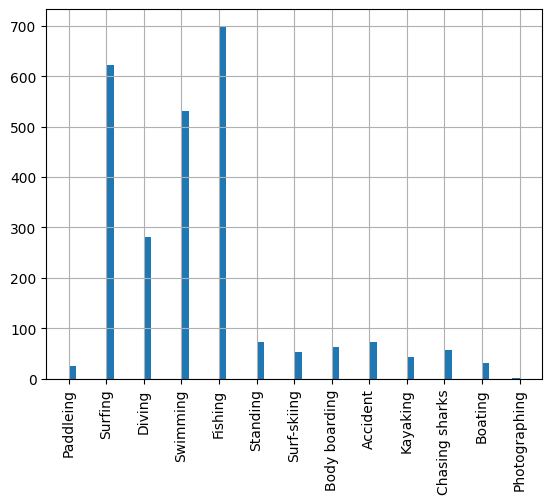

In [82]:
# Vemos como se distribuye Activity sin los unknowns

sharks_clean["Activity"].hist(bins=60)
plt.xticks(rotation=90)
sharks_clean["Activity"].value_counts()

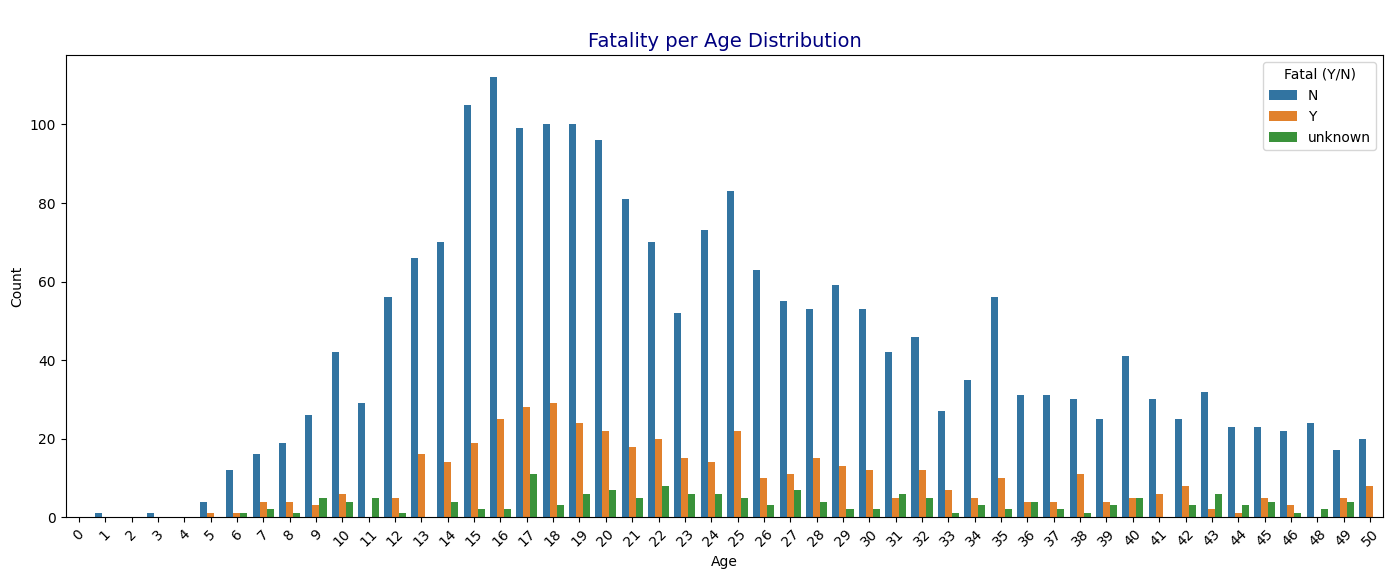

In [66]:
# Vamos a representar la distribucion de fatality por Age el head 50 par tratar de sacar conclusiones 
df = sharks_clean[["Age","Fatal (Y/N)"]].head(50)
plt.figure(figsize=(17, 6))
sns.countplot(x="Age",hue="Fatal (Y/N)", data=sharks_clean,order=df.index)
plt.title('\nFatality per Age Distribution', color='navy', size = 14)
plt.xlabel('Age')
plt.xticks(rotation =  45)
plt.ylabel('Count')
plt.show()

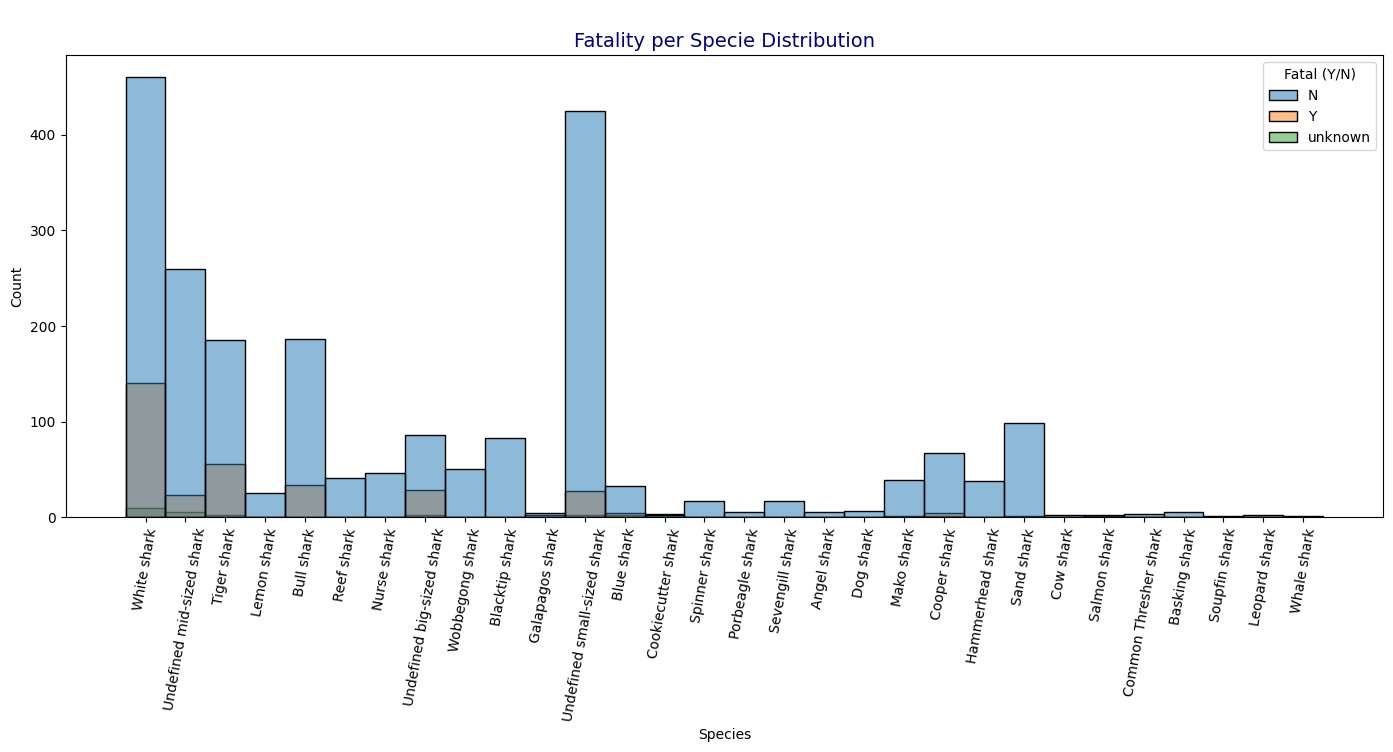

In [83]:
# Representamos la distribucion de Fatality por Specie
df = sharks_clean[["Species","Fatal (Y/N)"]].head(50)
plt.figure(figsize=(17, 6))
sns.histplot(x="Species",hue="Fatal (Y/N)", data=sharks_clean)
plt.title('\nFatality per Specie Distribution', color='navy', size = 14)
plt.xlabel('Species')
plt.xticks(rotation =  80)
plt.ylabel('Count')
plt.show()

In [121]:
# Aqui vemos como se agrupan los ataques segun la fecha y la especie aun que para nuestras hipotesis no son muy relevantes
sharks_clean[["Date","Species"]].groupby("Date").value_counts()

Date        Species                  
1901.07.30  White shark                  1
1901.09.23  Undefined mid-sized shark    1
1903.09.16  Undefined big-sized shark    1
1905.00.00  Undefined big-sized shark    1
1905.03.26  Undefined mid-sized shark    1
                                        ..
2018.05.27  Lemon shark                  1
2018.06.03  Tiger shark                  1
2018.06.04  Tiger shark                  1
2018.06.08  Undefined mid-sized shark    1
2018.06.25  White shark                  1
Name: count, Length: 2458, dtype: int64

In [147]:
df1 = sharks_clean["Species"].head(50)
df2 = sharks_clean["Country"].head(50)
pd.crosstab(df1,df2)

Country,AUSTRALIA,BAHAMAS,BRAZIL,COSTA RICA,CUBA,ECUADOR,LIBYA,MALAYSIA,MALDIVES,MEXICO,NEW CALEDONIA,NEW ZEALAND,SOUTH AFRICA,THAILAND,USA
Species,,,,,,,,,,,,,,,
Blacktip shark,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Blue shark,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Bull shark,2,1,0,0,0,0,0,0,0,0,1,0,0,1,1
Cookiecutter shark,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Galapagos shark,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Lemon shark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Nurse shark,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Reef shark,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Spinner shark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [221]:
# Agrupamos por Pais
sharks_clean[["Country","Species"]].head(50).groupby("Country").max()

,Species
Country,
AUSTRALIA,Wobbegong shark
BAHAMAS,Tiger shark
BRAZIL,Undefined small-sized shark
COSTA RICA,Tiger shark
CUBA,Tiger shark
ECUADOR,Galapagos shark
LIBYA,Blue shark
MALAYSIA,Nurse shark
MALDIVES,Tiger shark


In [223]:
sharks_clean[["Country","Species"]].head(50).groupby("Country").value_counts()

Country        Species                    
AUSTRALIA      Undefined mid-sized shark      4
               White shark                    4
               Wobbegong shark                3
               Bull shark                     2
               Reef shark                     2
               Undefined big-sized shark      2
               Cookiecutter shark             1
               Nurse shark                    1
BAHAMAS        Bull shark                     1
               Nurse shark                    1
               Tiger shark                    1
BRAZIL         Tiger shark                    1
               Undefined small-sized shark    1
COSTA RICA     Tiger shark                    3
CUBA           Tiger shark                    1
ECUADOR        Galapagos shark                1
LIBYA          Blue shark                     1
MALAYSIA       Nurse shark                    1
MALDIVES       Tiger shark                    1
MEXICO         Tiger shark                   

<Figure size 800x300 with 0 Axes>

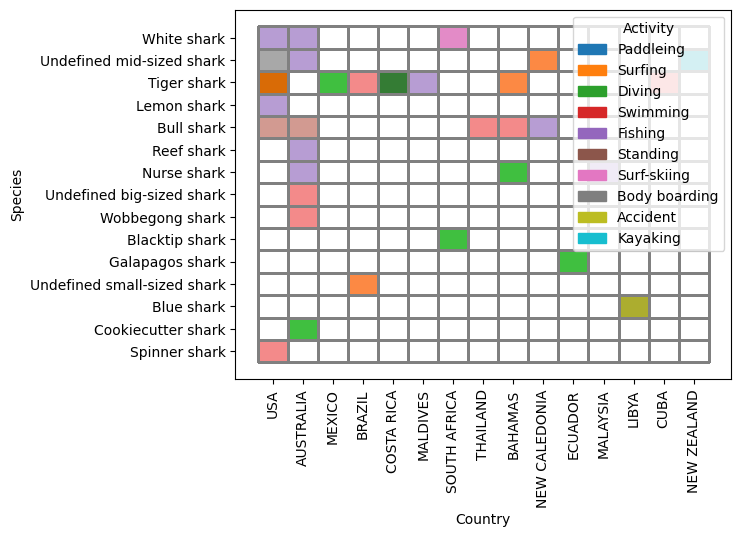

<Figure size 800x300 with 0 Axes>

In [204]:
# Separamos en otro data frame una muestra para visualizar lo que necesitamos
df = sharks_clean[["Activity","Species","Country"]].head(50)
df.columns
df
sns.histplot(x='Country', y='Species', hue='Activity', data=df,edgecolor="grey")
plt.xticks(rotation=90)
plt.legend()


In [216]:
# Hacemos un group by adicionalmente
sharks_clean[["Country","Species","Activity"]].head(50).groupby(["Activity","Species"]).max()



Country
Activity      Species                                   
Accident      Blue shark                           LIBYA
Body boarding Undefined mid-sized shark              USA
Diving        Blacktip shark                SOUTH AFRICA
              Cookiecutter shark               AUSTRALIA
              Galapagos shark                    ECUADOR
              Nurse shark                        BAHAMAS
              Reef shark                       AUSTRALIA
              Tiger shark                         MEXICO
              Undefined mid-sized shark              USA
              White shark                      AUSTRALIA
Fishing       Bull shark                   NEW CALEDONIA
              Lemon shark                            USA
              Nurse shark                       MALAYSIA
              Reef shark                       AUSTRALIA
              Tiger shark                       MALDIVES
              Undefined mid-sized shark        AUSTRALIA
              White shark                            USA
Kayaking      Undefined mid-sized shark      NEW ZEALAND
Paddleing     Tiger shark                            USA
              White shark                            USA
Standing      Bull shark                             USA
Surf-skiing   White shark                   SOUTH AFRICA
Surfing       Tiger shark                            USA
              Undefined big-sized shark        AUSTRALIA
              Undefined mid-sized shark    NEW CALEDONIA
              Undefined small-sized shark         BRAZIL
              White shark                   SOUTH AFRICA
              Wobbegong shark                  AUSTRALIA
Swimming      Bull shark                        THAILAND
              Spinner shark                          USA
              Tiger shark                           CUBA
              Undefined big-sized shark        AUSTRALIA
              White shark                      AUSTRALIA
              Wobbegong shark                  AUSTRALIA

In [217]:
sharks_clean[["Country","Species","Activity"]].head(50).groupby(["Country"]).max()

,Species,Activity
Country,,
AUSTRALIA,Wobbegong shark,Swimming
BAHAMAS,Tiger shark,Swimming
BRAZIL,Undefined small-sized shark,Swimming
COSTA RICA,Tiger shark,Diving
CUBA,Tiger shark,Swimming
ECUADOR,Galapagos shark,Diving
LIBYA,Blue shark,Accident
MALAYSIA,Nurse shark,Fishing
MALDIVES,Tiger shark,Fishing


In [222]:
sharks_clean[["Country","Species","Activity"]].head(50).groupby(["Activity","Country"]).value_counts()

Activity       Country        Species                    
Accident       LIBYA          Blue shark                     1
Body boarding  USA            Undefined mid-sized shark      1
Diving         AUSTRALIA      Cookiecutter shark             1
                              Reef shark                     1
                              White shark                    1
               BAHAMAS        Nurse shark                    1
               COSTA RICA     Tiger shark                    3
               ECUADOR        Galapagos shark                1
               MEXICO         Tiger shark                    1
               SOUTH AFRICA   Blacktip shark                 1
               USA            Undefined mid-sized shark      1
Fishing        AUSTRALIA      Nurse shark                    1
                              Reef shark                     1
                              Undefined mid-sized shark      1
                              White shark                   

In [218]:
sharks_clean[["Country","Species","Activity"]].head(50).groupby(["Activity"]).max()

,Country,Species
Activity,,
Accident,LIBYA,Blue shark
Body boarding,USA,Undefined mid-sized shark
Diving,USA,White shark
Fishing,USA,White shark
Kayaking,NEW ZEALAND,Undefined mid-sized shark
Paddleing,USA,White shark
Standing,USA,Bull shark
Surf-skiing,SOUTH AFRICA,White shark
Surfing,USA,Wobbegong shark
